In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [33]:
df_housing = pd.read_csv('C:\Victor\Housing.csv')

In [34]:
df_housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [35]:
df_housing.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

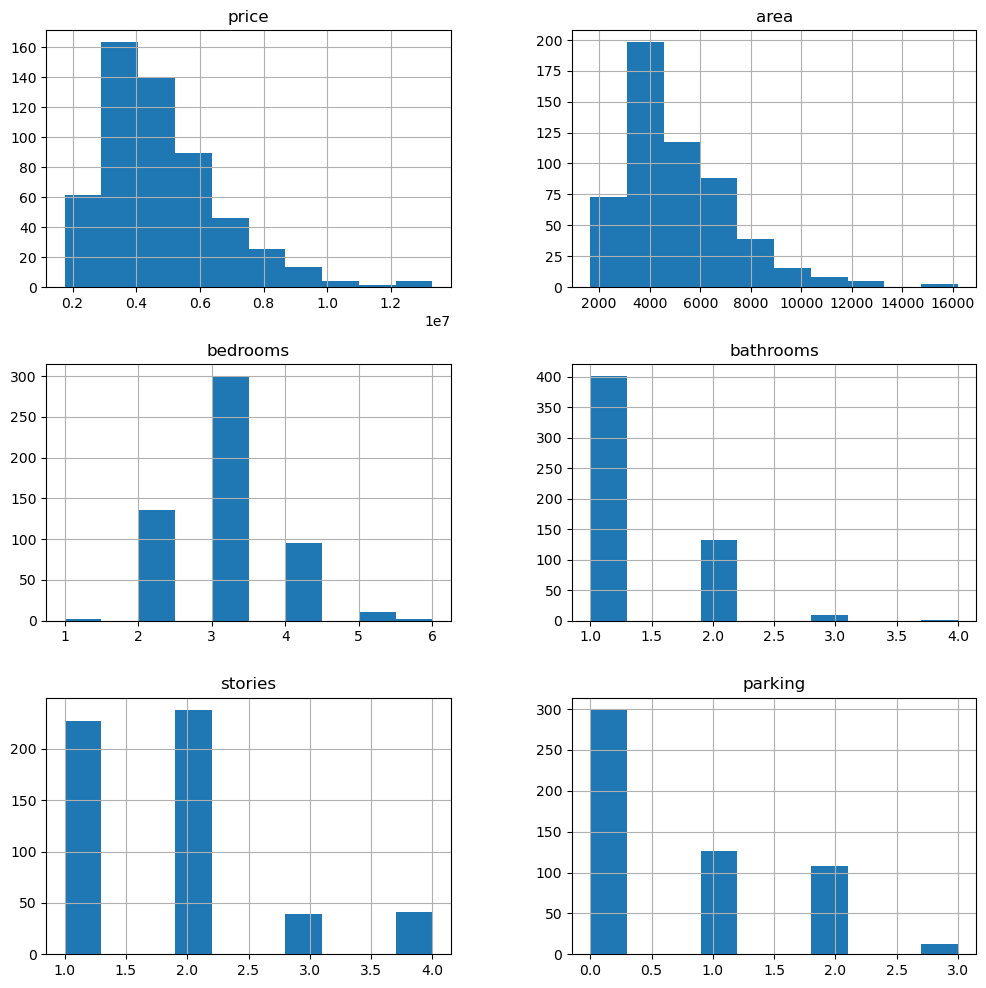

In [36]:
plt.rcParams['figure.figsize'] = [12, 12]
df_housing.hist()

In [37]:
df_housing.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [38]:
# Поиск дупликатов
full_duplicates = df_housing.duplicated().sum()
print(f"Полных дубликатов (все поля одинаковые): {full_duplicates}")

Полных дубликатов (все поля одинаковые): 0


In [39]:
#Подсчёт частоты уникальности встречаемости каждого уникального значения (или «цепочек» событий)
df_housing[['bedrooms', 'bathrooms', 'stories', 'mainroad']].value_counts()

bedrooms  bathrooms  stories  mainroad
2         1          1        yes         91
3         1          2        yes         90
                     1        yes         72
4         1          2        yes         28
3         2          2        yes         25
4         2          2        yes         25
3         1          2        no          21
                     3        yes         20
2         1          2        yes         19
                     1        no          18
3         2          4        yes         17
                     1        yes         15
          1          1        no          13
          2          3        yes         11
4         2          4        yes          9
3         1          4        yes          8
4         2          1        yes          6
                     2        no           5
          1          4        yes          4
                     2        no           4
2         2          1        yes          4
3         2     

In [40]:
df_housing['mainroad'] = df_housing['mainroad'].map({'yes': 1, 'no': 0}).astype('Int64')

In [41]:
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished


In [42]:
df_housing['guestroom'] = df_housing['guestroom'].map({'yes': 1, 'no': 0}).astype('Int64')

In [43]:
df_housing['basement'] = df_housing['basement'].map({'yes': 1, 'no': 0}).astype('Int64')

In [44]:
df_housing['hotwaterheating'] = df_housing['hotwaterheating'].map({'yes': 1, 'no': 0}).astype('Int64')

In [45]:
df_housing['airconditioning'] = df_housing['airconditioning'].map({'yes': 1, 'no': 0}).astype('Int64')

In [46]:
df_housing['prefarea'] = df_housing['prefarea'].map({'yes': 1, 'no': 0}).astype('Int64')

In [47]:
df_housing['furnishingstatus'] = df_housing['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}).astype('Int64')

In [48]:
df_housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


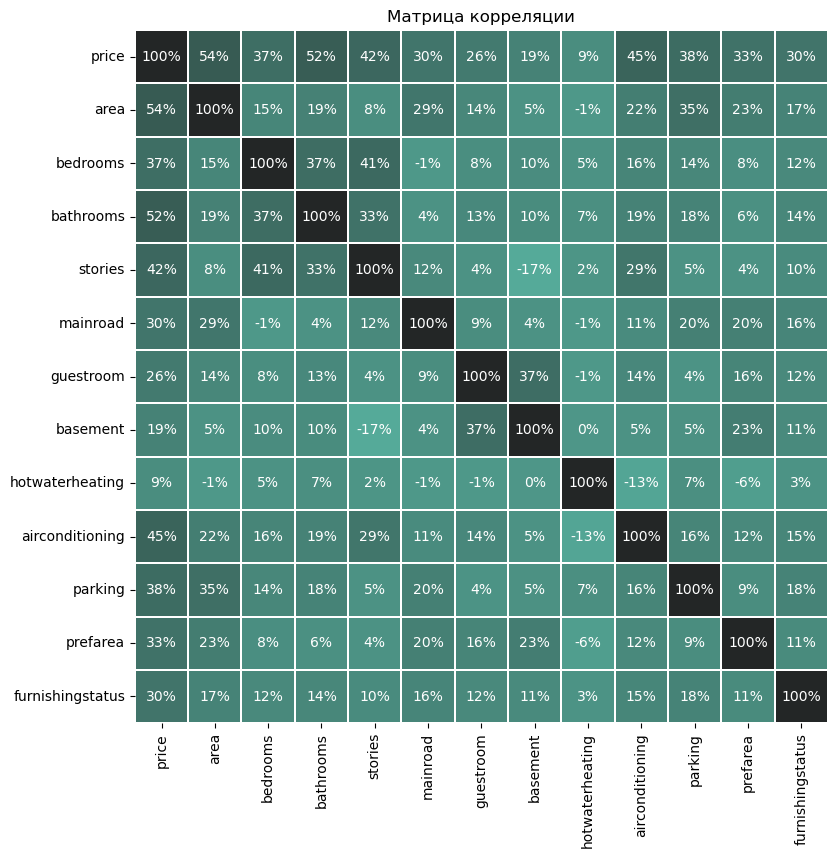

In [51]:
plt.figure(figsize = (9,9))
sns.heatmap(df_housing.corr(),
            xticklabels = df_housing.corr().columns,
            yticklabels = df_housing.corr().columns,
            annot = True,
            fmt = '.0%',
            square = True,
            linewidth = 0.1,
            cmap = sns.color_palette("dark:#5A9_r", as_cmap=True),
            cbar = False
)
plt.title('Матрица корреляции')
plt.show()

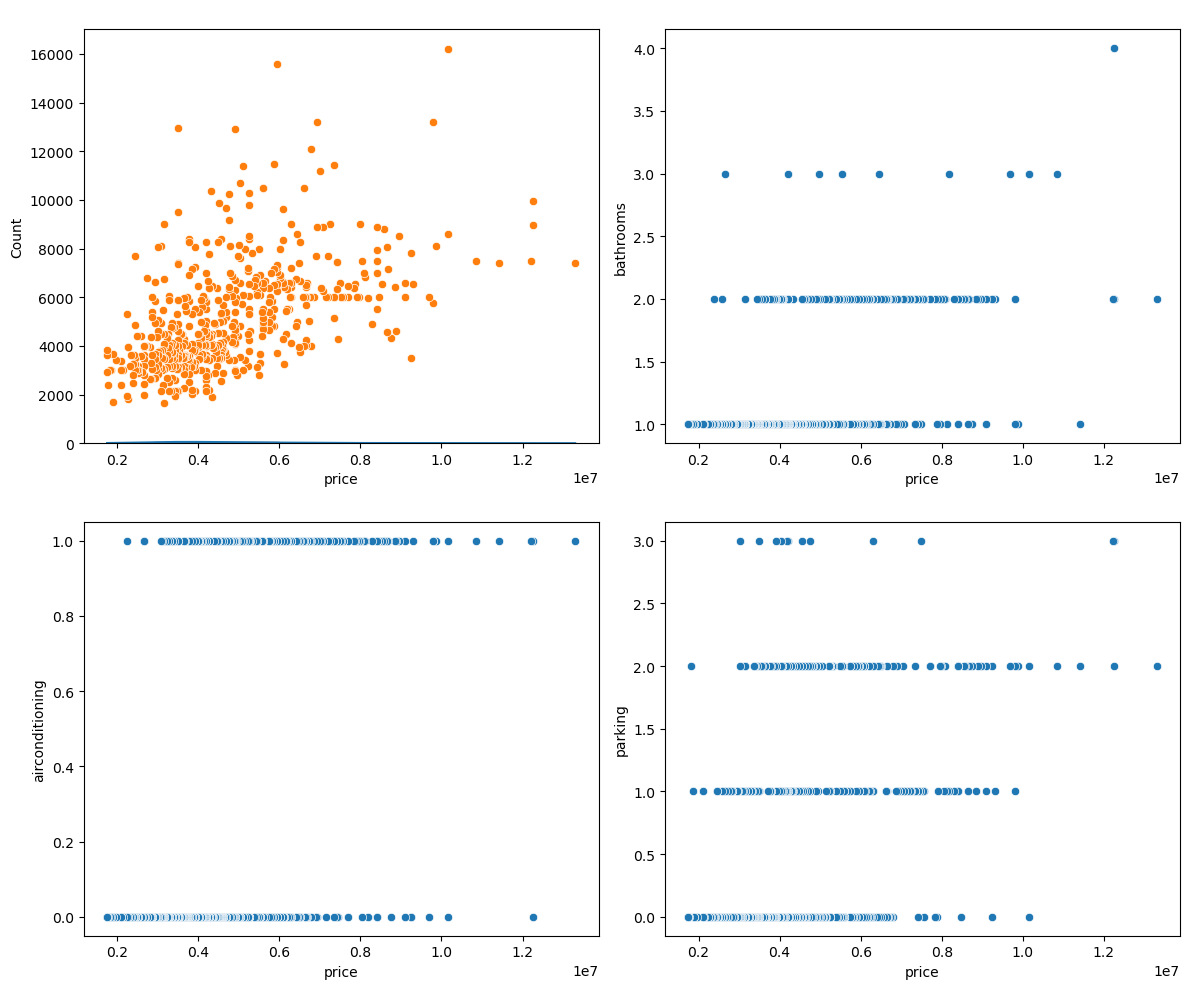

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data=df_housing, x="price", kde=True, ax=axes[0,0], bins=30) 
axes[0,0].set_title(" ")
sns.scatterplot(data=df_housing, x="price", y="area", ax=axes[0,0])
axes[0,1].set_title(" ")
sns.scatterplot(data=df_housing, x="price", y="bathrooms", ax=axes[0,1])
axes[1,0].set_title(" ")
sns.scatterplot(data=df_housing, x="price", y="airconditioning", ax=axes[1,0])
axes[1,1].set_title(" ")
sns.scatterplot(data=df_housing, x="price", y="parking", ax=axes[1,1])
plt.tight_layout()
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

# Разделяем данные
x = df_housing.drop(columns=["price"])
y = df_housing['price']

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

In [86]:
# Случайный лес

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

rf = RandomForestRegressor(
    n_estimators=200, # Количество деревьев в "лесу". 100 — стандартное значение.
    random_state=42,  # Фиксация генератора случайных чисел для воспроизводимости результата.
    n_jobs=-1         # Параметр распараллеливания: -1 означает использование всех ядер процессора.
)

rf.fit(x, y)
rf_predict = rf.predict(X_test)

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [88]:
mse = mean_squared_error(y_test, rf_predict)
mae = mean_absolute_error(y_test, rf_predict)
mse


308898135256.6699